![WhatsApp Image 2025-10-01 at 14.19.22_312cdc26.jpg](<attachment:WhatsApp Image 2025-10-01 at 14.19.22_312cdc26.jpg>)
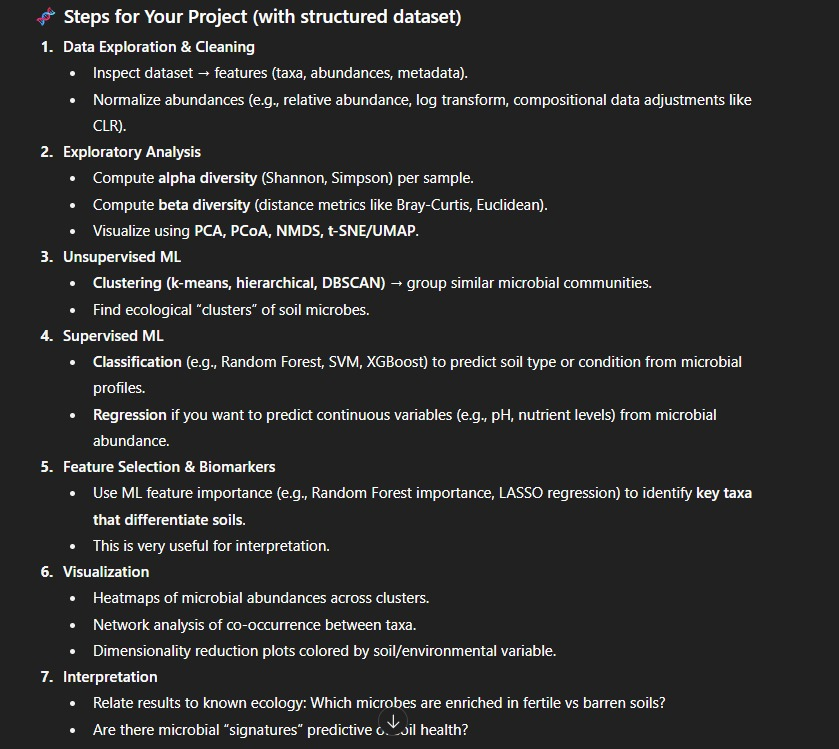

#### 1. Data exploration and cleaning

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from skbio.diversity import alpha_diversity, beta_diversity
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Load dataset
# ----------------------------
file_path = "E:\S3\IBS\Meta-Genomic-Data-Analytics\Dataset\Soil_microbe_dataset.csv"
df = pd.read_csv(file_path)

# ----------------------------
# 1. Data Cleaning
# ----------------------------
# Check missing values
print(df.isna().sum())

# Fill or drop missing if any (here none)
df = df.dropna()

# Extract abundance features
abundance_cols = ["Bacteria_Abundance (%)", "Fungi_Abundance (%)"]

# ----------------------------
# 2. Normalize abundances
# ----------------------------
# Relative abundance
df_rel_abund = df[abundance_cols].div(df[abundance_cols].sum(axis=1), axis=0)

# Log-transform
df_log_abund = np.log1p(df_rel_abund)

# CLR (Centered Log-Ratio) transform
def clr_transform(data):
    gm = np.exp(np.mean(np.log(data+1e-9), axis=1))  # geometric mean
    return np.log((data.T / gm).T)

df_clr_abund = clr_transform(df_rel_abund)

<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
C:\Users\RAHUL L S\AppData\Local\Temp\ipykernel_30780\81530778.py:15: SyntaxWarning: invalid escape sequence '\S'
  file_path = "E:\S3\IBS\Meta-Genomic-Data-Analytics\Dataset\Soil_microbe_dataset.csv"


ID                          0
Soil_pH                     0
Organic_C (%)               0
Total_N (%)                 0
C_N_Ratio                   0
Land_Use_Type               0
Soil_Depth_cm               0
Bacteria_Abundance (%)      0
Fungi_Abundance (%)         0
β_Glucosidase (µmol/g/h)    0
Urease (µmol/g/h)           0
CO2_Emission (µg/g/day)     0
NH4_Nitrate (µg/g)          0
dtype: int64


#### 2. Exploratory Analysis


Alpha Diversity (first 5 samples):
     shannon   simpson
ID                    
1   0.678982  0.485902
2   0.659679  0.466907
3   0.687547  0.494410
4   0.634314  0.442330
5   0.659818  0.467043


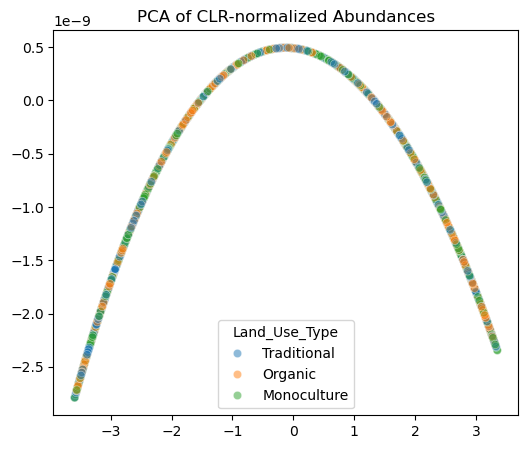

KeyboardInterrupt: 

In [16]:
# ----------------------------
# 3. Alpha Diversity
# ----------------------------
from skbio.diversity import alpha_diversity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

alpha_metrics = ["shannon", "simpson"]

# Compute each alpha diversity metric separately
alpha_div_dict = {}
for metric in alpha_metrics:
    alpha_div_dict[metric] = alpha_diversity(metric, df_rel_abund.values, ids=df["ID"].astype(str))

alpha_div = pd.DataFrame(alpha_div_dict)
print("\nAlpha Diversity (first 5 samples):")
print(alpha_div.head())

# ----------------------------
# 4. Dimensionality Reduction & Visualization
# ----------------------------
scaler = StandardScaler()
scaled = scaler.fit_transform(df_clr_abund)

# PCA
pca = PCA(n_components=2)
pca_res = pca.fit_transform(scaled)
plt.figure(figsize=(6,5))
sns.scatterplot(x=pca_res[:,0], y=pca_res[:,1], hue=df["Land_Use_Type"], alpha=0.5)
plt.title("PCA of CLR-normalized Abundances")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_res = tsne.fit_transform(scaled)
plt.figure(figsize=(6,5))
sns.scatterplot(x=tsne_res[:,0], y=tsne_res[:,1], hue=df["Land_Use_Type"], alpha=0.5)
plt.title("t-SNE of CLR-normalized Abundances")
plt.show()

# UMAP
reducer = umap.UMAP(random_state=42)
umap_res = reducer.fit_transform(scaled)
plt.figure(figsize=(6,5))
sns.scatterplot(x=umap_res[:,0], y=umap_res[:,1], hue=df["Land_Use_Type"], alpha=0.5)
plt.title("UMAP of CLR-normalized Abundances")
plt.show()

#### 3. Unsupervised ML

<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\S'
C:\Users\RAHUL L S\AppData\Local\Temp\ipykernel_16608\286391241.py:12: SyntaxWarning: invalid escape sequence '\S'
  file_path = "E:\S3\IBS\Meta-Genomic-Data-Analytics\Dataset\Soil_microbe_dataset.csv"


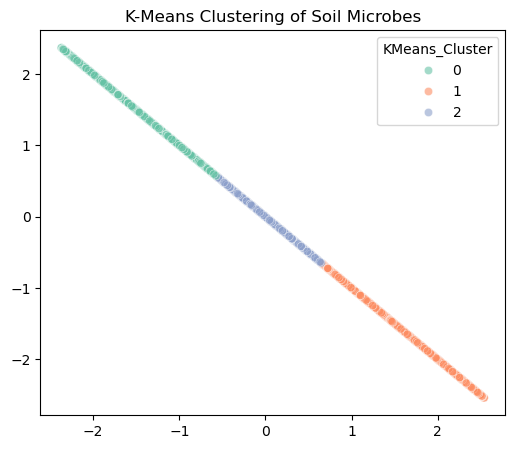

C:\Users\RAHUL L S\AppData\Local\Temp\ipykernel_16608\286391241.py:12: SyntaxWarning: invalid escape sequence '\S'
  file_path = "E:\S3\IBS\Meta-Genomic-Data-Analytics\Dataset\Soil_microbe_dataset.csv"


MemoryError: Unable to allocate 37.3 GiB for an array with shape (4999950000,) and data type float64

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Load dataset
# ----------------------------
file_path = "E:\S3\IBS\Meta-Genomic-Data-Analytics\Dataset\Soil_microbe_dataset.csv"
df = pd.read_csv(file_path)

# Abundance features
abundance_cols = ["Bacteria_Abundance (%)", "Fungi_Abundance (%)"]

# ----------------------------
# CLR Normalization
# ----------------------------
def clr_transform(data):
    gm = np.exp(np.mean(np.log(data + 1e-9), axis=1))  # geometric mean
    return np.log((data.T / gm).T)

df_rel_abund = df[abundance_cols].div(df[abundance_cols].sum(axis=1), axis=0)
df_clr_abund = clr_transform(df_rel_abund)

# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(df_clr_abund)

# ----------------------------
# 1. K-Means Clustering
# ----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=scaled[:,0], y=scaled[:,1], hue=df["KMeans_Cluster"], palette="Set2", alpha=0.6)
plt.title("K-Means Clustering of Soil Microbes")
plt.show()

# ----------------------------
# 2. Hierarchical Clustering
# ----------------------------
hier = AgglomerativeClustering(n_clusters=3, linkage="ward")
df["Hier_Cluster"] = hier.fit_predict(scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=scaled[:,0], y=scaled[:,1], hue=df["Hier_Cluster"], palette="Set1", alpha=0.6)
plt.title("Hierarchical Clustering of Soil Microbes")
plt.show()

# Optional: Dendrogram
Z = linkage(scaled, method='ward')
plt.figure(figsize=(10,4))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# ----------------------------
# 3. DBSCAN Clustering
# ----------------------------
dbscan = DBSCAN(eps=0.5, min_samples=10)
df["DBSCAN_Cluster"] = dbscan.fit_predict(scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=scaled[:,0], y=scaled[:,1], hue=df["DBSCAN_Cluster"], palette="tab10", alpha=0.6)
plt.title("DBSCAN Clustering of Soil Microbes")
plt.show()

# ----------------------------
# Cluster Summary
# ----------------------------
print("\nCluster Distribution:")
print(df[["KMeans_Cluster", "Hier_Cluster", "DBSCAN_Cluster"]].value_counts())


In [19]:
pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [20]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl (8.7 MB)
Note: you may need to restart the kernel to use updated packages.


### 4. Suprevised ML

##### 1. Classificaton of Land_Use_Type via XGBoost

c:\Users\RAHUL L S\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:

              precision    recall  f1-score   support

 Monoculture       0.32      0.30      0.31      6620
     Organic       0.33      0.33      0.33      6668
 Traditional       0.33      0.36      0.34      6712

    accuracy                           0.33     20000
   macro avg       0.33      0.33      0.33     20000
weighted avg       0.33      0.33      0.33     20000



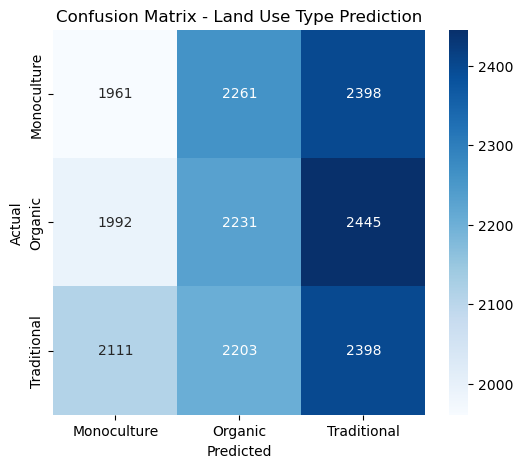

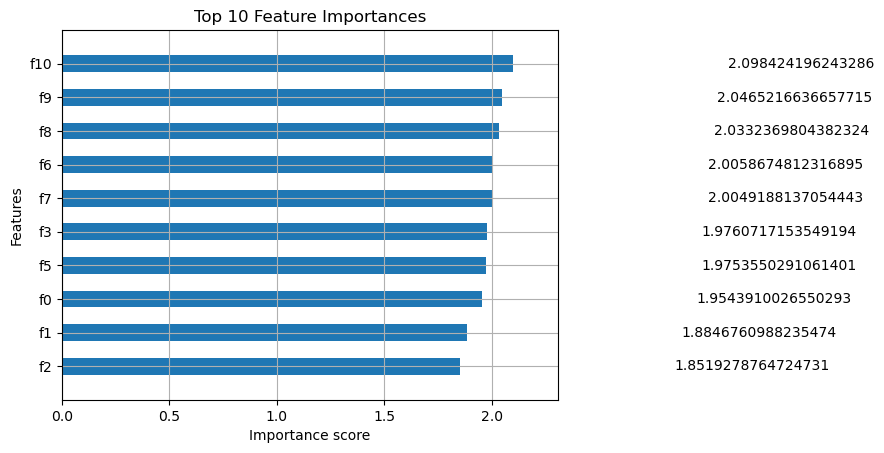

c:\Users\RAHUL L S\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\RAHUL L S\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\RAHUL L S\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\RAHUL L S\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



Cross-validation accuracy: 0.333 ± 0.002


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# Load dataset
# ----------------------------
file_path = r"E:\S3\IBS\Meta-Genomic-Data-Analytics\Dataset\Soil_microbe_dataset.csv"
df = pd.read_csv(file_path)

# ----------------------------
# Features & Target
# ----------------------------
X = df.drop(columns=["ID", "Land_Use_Type"])
y = df["Land_Use_Type"]

# ----------------------------
# Convert non-numeric features to numeric
# ----------------------------
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns

def range_to_mid(x):
    if isinstance(x, str) and "–" in x:
        start, end = x.split("–")
        return (float(start) + float(end)) / 2
    else:
        try:
            return float(x)
        except:
            return np.nan

for col in non_numeric_cols:
    X[col] = X[col].apply(range_to_mid)

# Fill any remaining NaN values with column mean
X = X.fillna(X.mean())

# ----------------------------
# Encode target
# ----------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ----------------------------
# Train/Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ----------------------------
# Scale Features
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# XGBoost Model
# ----------------------------
model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

# Train model
model.fit(X_train_scaled, y_train)

# ----------------------------
# Evaluation
# ----------------------------
y_pred = model.predict(X_test_scaled)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Land Use Type Prediction")
plt.show()

# ----------------------------
# Feature Importance
# ----------------------------
xgb.plot_importance(model, importance_type="gain", max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances")
plt.show()

# ----------------------------
# Cross-Validation Accuracy
# ----------------------------
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

#### 2. Predicing CO2 emmision using XGBoost with SHAP is in seperate file

### 5. Feature Selection & Biomarkers

C:\Users\RAHUL L S\AppData\Local\Temp\ipykernel_16608\1505807809.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances[:10], y=rf_importances.index[:10], palette="viridis")


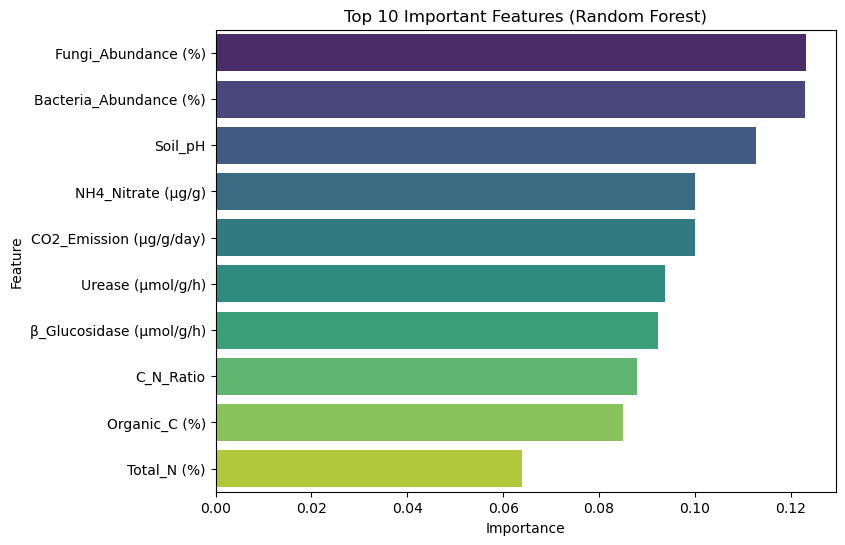


Top 10 Random Forest Features:
Fungi_Abundance (%)         0.123150
Bacteria_Abundance (%)      0.122927
Soil_pH                     0.112692
NH4_Nitrate (µg/g)          0.100018
CO2_Emission (µg/g/day)     0.099953
Urease (µmol/g/h)           0.093650
β_Glucosidase (µmol/g/h)    0.092306
C_N_Ratio                   0.087883
Organic_C (%)               0.084953
Total_N (%)                 0.063974
dtype: float64


C:\Users\RAHUL L S\AppData\Local\Temp\ipykernel_16608\1505807809.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso_importances[:10], y=lasso_importances.index[:10], palette="magma")


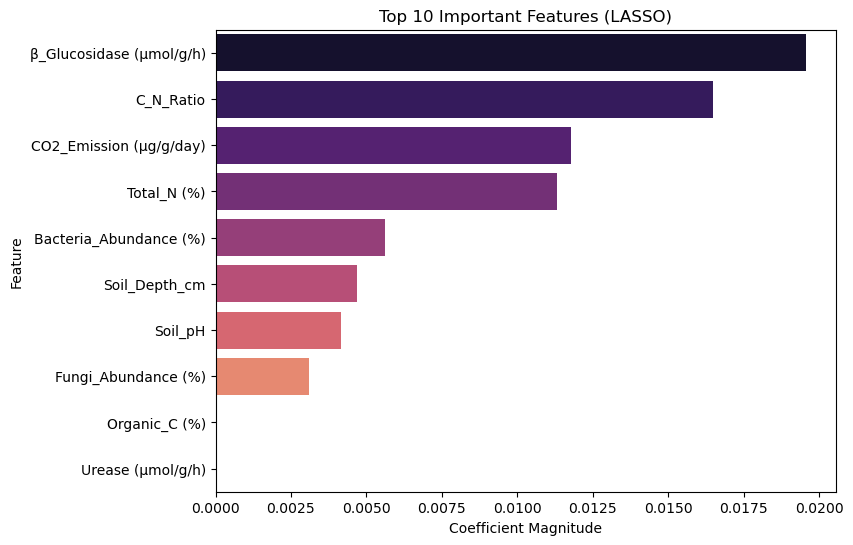


Top 10 LASSO-selected Features:
β_Glucosidase (µmol/g/h)    0.019561
C_N_Ratio                   0.016467
CO2_Emission (µg/g/day)     0.011772
Total_N (%)                 0.011307
Bacteria_Abundance (%)      0.005606
Soil_Depth_cm               0.004688
Soil_pH                     0.004172
Fungi_Abundance (%)         0.003096
Organic_C (%)               0.000000
Urease (µmol/g/h)           0.000000
dtype: float64


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Load dataset
# ----------------------------
file_path = r"E:\S3\IBS\Meta-Genomic-Data-Analytics\Dataset\Soil_microbe_dataset.csv"
df = pd.read_csv(file_path)

# ----------------------------
# Features & Target
# ----------------------------
X = df.drop(columns=["ID", "Land_Use_Type"])
y = df["Land_Use_Type"]

# ----------------------------
# Convert non-numeric columns to numeric
# ----------------------------
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns

def range_to_mid(x):
    if isinstance(x, str) and "–" in x:
        start, end = x.split("–")
        return (float(start) + float(end)) / 2
    else:
        try:
            return float(x)
        except:
            return np.nan

for col in non_numeric_cols:
    X[col] = X[col].apply(range_to_mid)

# Fill remaining NaN with column mean
X = X.fillna(X.mean())

# ----------------------------
# Encode target
# ----------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ----------------------------
# Train/test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ----------------------------
# Scale for LASSO
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 1. Random Forest Feature Importance
# ----------------------------
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances[:10], y=rf_importances.index[:10], palette="viridis")
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\nTop 10 Random Forest Features:")
print(rf_importances.head(10))

# ----------------------------
# 2. LASSO Regression (Logistic with L1)
# ----------------------------
lasso = LogisticRegression(penalty="l1", solver="saga", C=0.1, max_iter=5000, random_state=42)
lasso.fit(X_train_scaled, y_train)

lasso_importances = pd.Series(np.abs(lasso.coef_).mean(axis=0), index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=lasso_importances[:10], y=lasso_importances.index[:10], palette="magma")
plt.title("Top 10 Important Features (LASSO)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

print("\nTop 10 LASSO-selected Features:")
print(lasso_importances.head(10))


### 6. Visualization

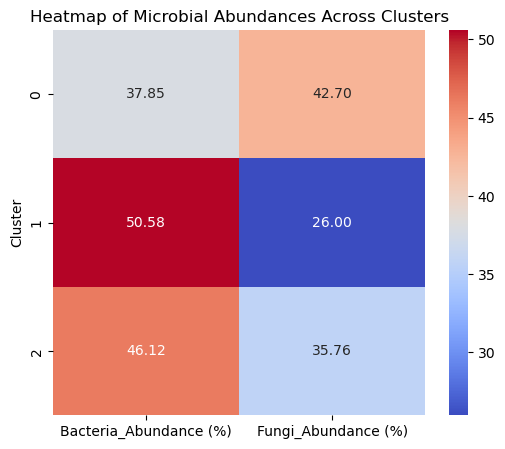

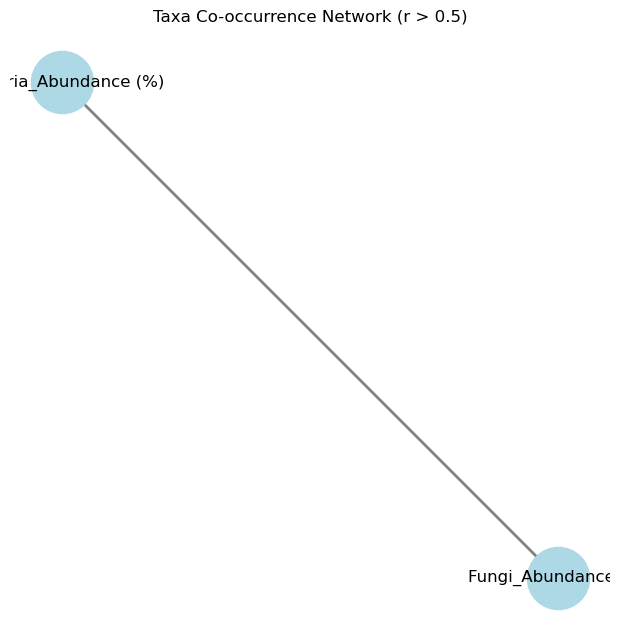

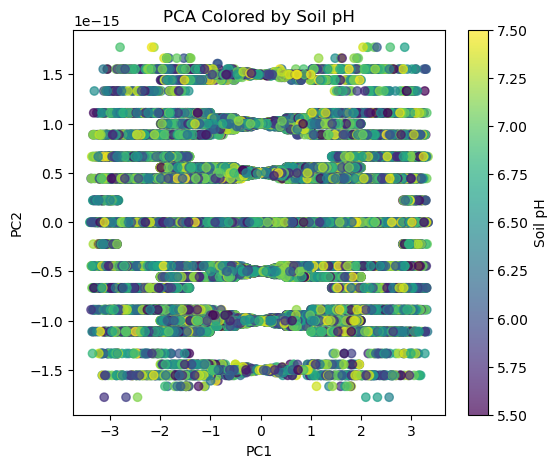

c:\Users\RAHUL L S\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KeyboardInterrupt: 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap.umap_ as umap
import networkx as nx

# ----------------------------
# Load dataset
# ----------------------------
file_path = r"E:\S3\IBS\Meta-Genomic-Data-Analytics\Dataset\Soil_microbe_dataset.csv"
df = pd.read_csv(file_path)

# ----------------------------
# Abundance features
# ----------------------------
abundance_cols = ["Bacteria_Abundance (%)", "Fungi_Abundance (%)"]
df_rel_abund = df[abundance_cols].div(df[abundance_cols].sum(axis=1), axis=0)

# ----------------------------
# 1. Heatmap of microbial abundances across clusters
# ----------------------------
scaler = StandardScaler()
scaled = scaler.fit_transform(df_rel_abund)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled)

cluster_means = df.groupby("Cluster")[abundance_cols].mean()

plt.figure(figsize=(6,5))
sns.heatmap(cluster_means, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap of Microbial Abundances Across Clusters")
plt.show()

# ----------------------------
# 2. Network Analysis (Co-occurrence)
# ----------------------------
corr_matrix = df_rel_abund.corr()

G = nx.Graph()
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > 0.5:
            G.add_edge(i, j, weight=corr_matrix.loc[i, j])

plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", 
        font_size=12, width=2, edge_color="gray")
plt.title("Taxa Co-occurrence Network (r > 0.5)")
plt.show()

# ----------------------------
# 3. Dimensionality Reduction Plots
# ----------------------------
# PCA
pca = PCA(n_components=2)
pca_res = pca.fit_transform(scaled)

plt.figure(figsize=(6,5))
scatter = plt.scatter(pca_res[:,0], pca_res[:,1], 
                      c=df["Soil_pH"], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Soil pH")
plt.title("PCA Colored by Soil pH")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# UMAP
reducer = umap.UMAP(random_state=42)
umap_res = reducer.fit_transform(scaled)

plt.figure(figsize=(6,5))
scatter = plt.scatter(umap_res[:,0], umap_res[:,1], 
                      c=df["Organic_C (%)"], cmap="plasma", alpha=0.7)
plt.colorbar(scatter, label="Organic C (%)")
plt.title("UMAP Colored by Organic Carbon (%)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

### 7. Interpretation


Soil Health Biomarker Framework:

                Indicator Fertile/Healthy Soil Degraded/Barren Soil
0  Bacteria_Abundance (%)                 High                  Low
1     Fungi_Abundance (%)             Moderate                 High
2  β-Glucosidase Activity                 High                  Low
3         Urease Activity                 High                  Low
4           Organic_C (%)                 High                  Low
5             Total_N (%)                 High                  Low
6               C:N Ratio             Balanced              Extreme
7            CO₂ Emission             Moderate                 High


C:\Users\RAHUL L S\AppData\Local\Temp\ipykernel_30780\3363335520.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_summary.set_index("Indicator").replace(


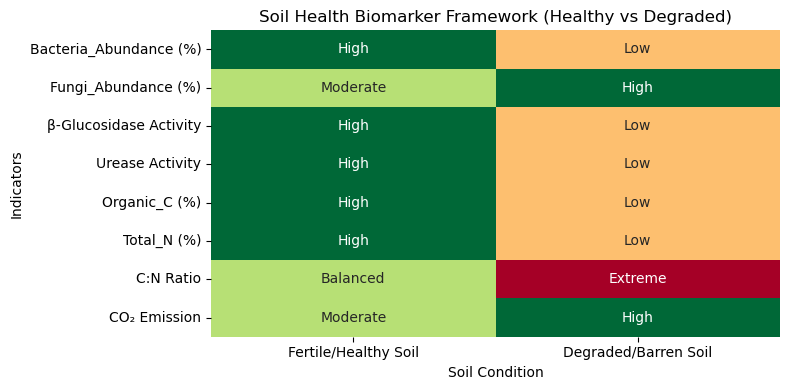

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# Soil Health Biomarker Framework
# ----------------------------
data = {
    "Indicator": [
        "Bacteria_Abundance (%)",
        "Fungi_Abundance (%)",
        "β-Glucosidase Activity",
        "Urease Activity",
        "Organic_C (%)",
        "Total_N (%)",
        "C:N Ratio",
        "CO₂ Emission"
    ],
    "Fertile/Healthy Soil": [
        "High",      # Bacteria
        "Moderate",  # Fungi balanced
        "High",      # Glucosidase
        "High",      # Urease
        "High",      # Organic C
        "High",      # Nitrogen
        "Balanced",  # C:N ratio
        "Moderate"   # CO₂ turnover
    ],
    "Degraded/Barren Soil": [
        "Low",       # Bacteria
        "High",      # Fungi dominate
        "Low",       # Glucosidase
        "Low",       # Urease
        "Low",       # Organic C
        "Low",       # Nitrogen
        "Extreme",   # Imbalance
        "High"       # Stress respiration
    ]
}

df_summary = pd.DataFrame(data)

print("\nSoil Health Biomarker Framework:\n")
print(df_summary)

# ----------------------------
# Visualization as Heatmap-like Table
# ----------------------------
plt.figure(figsize=(8,4))
sns.heatmap(
    df_summary.set_index("Indicator").replace(
        {"High": 3, "Moderate": 2, "Balanced": 2, "Low": 1, "Extreme": 0}
    ),
    cmap="RdYlGn", annot=df_summary.set_index("Indicator"), fmt="", cbar=False
)

plt.title("Soil Health Biomarker Framework (Healthy vs Degraded)")
plt.ylabel("Indicators")
plt.xlabel("Soil Condition")
plt.tight_layout()
plt.show()